In [1]:
#importing the impportant libraries
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print(tf.__version__)

1.15.0


In [2]:
#importing the dataset
dataset=pd.read_csv("auto-mpg.csv")
dataset.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
dataset = dataset.replace('?',np.nan)

In [6]:
dataset["horsepower"] = dataset.horsepower.astype(float)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [8]:
#checking some information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
#Describing the dataset for checking the min,max,median,percentile of the data
dataset.describe()

In [9]:
#checking if there is some null values in the dataset
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [10]:
#It is fine we donot have any null values
#So no need to check how many null values but still if you want to see how to check that
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
dataset.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [12]:
#Changing the column names
dataset.rename(columns = {"mpg": "MPG", 
                                  "weight":"Weight"},inplace=True) 

In [13]:
dataset.columns

Index(['MPG', 'cylinders', 'displacement', 'horsepower', 'Weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [14]:
#okk again here there is no null values but easiest way to handle null values is to drop the rows 
#if the data is sufficient otherwise dropping the rows make our machine learning model worst
dataset.dropna(inplace=True)

In [15]:
Origin=dataset.pop('origin')
dataset['USA'] = (Origin == 1)*1.0
dataset['Europe'] = (Origin == 2)*1.0
dataset['Japan'] = (Origin == 3)*1.0
dataset.tail()

,MPG,cylinders,displacement,horsepower,Weight,acceleration,model year,car name,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720,19.4,82,chevy s-10,1.0,0.0,0.0


In [16]:
dataset.head()
dataset.drop(['car name'],axis=1,inplace=True)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
MPG             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
Weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
USA             392 non-null float64
Europe          392 non-null float64
Japan           392 non-null float64
dtypes: float64(7), int64(3)
memory usage: 33.7 KB


In [18]:
#splitting the data into training and all
train_dataset=dataset.sample(frac=0.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

In [19]:
train_dataset.tail()

,MPG,cylinders,displacement,horsepower,Weight,acceleration,model year,USA,Europe,Japan
281,19.8,6,200.0,85.0,2990,18.2,79,1.0,0.0,0.0
229,16.0,8,400.0,180.0,4220,11.1,77,1.0,0.0,0.0
150,26.0,4,108.0,93.0,2391,15.5,74,0.0,0.0,1.0
145,32.0,4,83.0,61.0,2003,19.0,74,0.0,0.0,1.0
182,28.0,4,107.0,86.0,2464,15.5,76,0.0,1.0,0.0


In [21]:
test_dataset.tail()

,MPG,cylinders,displacement,horsepower,Weight,acceleration,model year,USA,Europe,Japan
369,34.0,4,112.0,88.0,2395,18.0,82,1.0,0.0,0.0
375,36.0,4,105.0,74.0,1980,15.3,82,0.0,1.0,0.0
382,34.0,4,108.0,70.0,2245,16.9,82,0.0,0.0,1.0
384,32.0,4,91.0,67.0,1965,15.7,82,0.0,0.0,1.0
396,28.0,4,120.0,79.0,2625,18.6,82,1.0,0.0,0.0


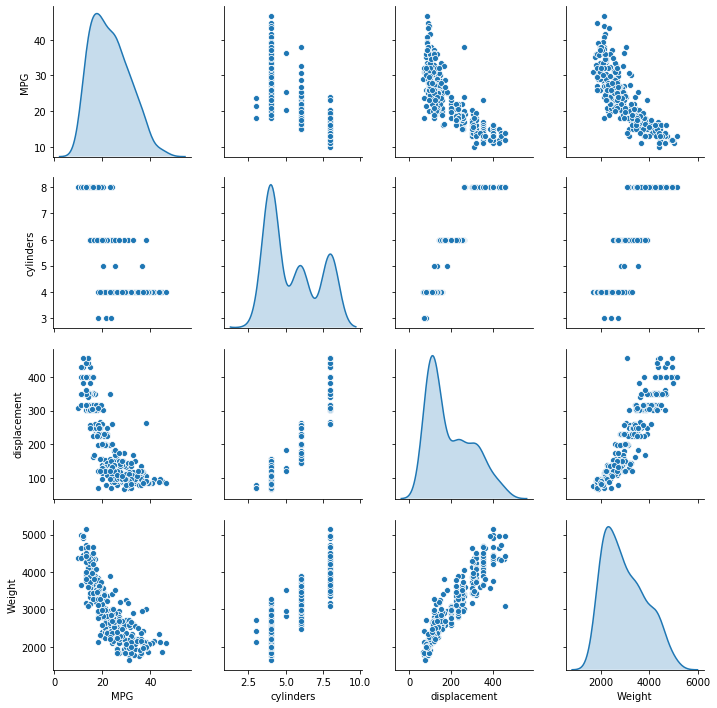

In [22]:
#Building the pairplot for seeing the relationship and the distribution
sns.pairplot(train_dataset[["MPG", "cylinders", "displacement", "Weight"]], diag_kind="kde")

In [23]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [24]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [25]:
dataset.head()

,MPG,cylinders,displacement,horsepower,Weight,acceleration,model year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1.0,0.0,0.0


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
MPG             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
Weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
USA             392 non-null float64
Europe          392 non-null float64
Japan           392 non-null float64
dtypes: float64(7), int64(3)
memory usage: 43.7 KB


In [27]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']  
normed_train_data = norm(train_dataset)
normed_test_data =  norm(test_dataset)

In [28]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [29]:
model = build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [31]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.2729956 ],
       [-0.12422563],
       [ 0.0548351 ],
       [-0.05827085],
       [ 0.10218853],
       [ 0.06753329],
       [ 0.08882584],
       [-0.06178301],
       [-0.2115696 ],
       [-0.29863667]], dtype=float32)

In [32]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.183397,0.955823,2.183397,9.346231,2.343438,9.346232,995
996,2.421934,1.016951,2.421934,9.096788,2.299093,9.096788,996
997,2.159090,0.917597,2.159090,9.030648,2.271876,9.030647,997
998,2.255668,0.950749,2.255668,8.771787,2.246871,8.771787,998
999,2.230647,0.947337,2.230647,9.126752,2.292286,9.126752,999


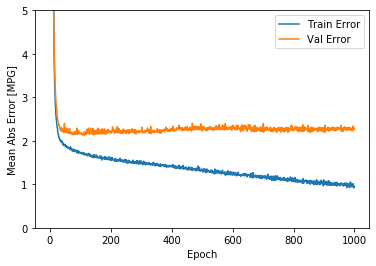

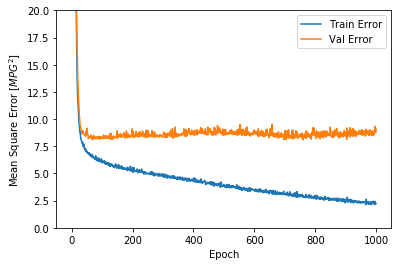

In [34]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

In [35]:
'''This graph shows little improvement, or even degradation in the validation error 
after about 100 epochs. Let's update the model.fit call to automatically stop training when the 
validation score doesn't improve. We'll use an EarlyStopping callback that tests a training condition
for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop 
the training.
'''

"This graph shows little improvement, or even degradation in the validation error \nafter about 100 epochs. Let's update the model.fit call to automatically stop training when the \nvalidation score doesn't improve. We'll use an EarlyStopping callback that tests a training condition\nfor every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop \nthe training.\n"

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

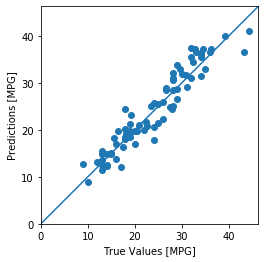

In [36]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


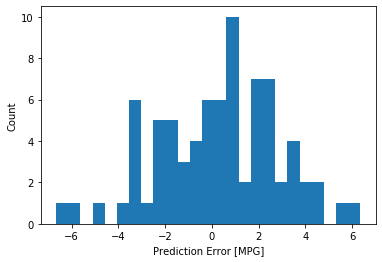

In [37]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")


In [ ]:
'''
    Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
    Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
    When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
    If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
    Early stopping is a useful technique to prevent overfitting.
'''